# **Digital Twin Security Survey**


#📖 **Contents**

**📦 Import Packages**

**📥 Import Data**

**📚 1. General bibliometric data/charts**

**🔬 2. RQ1 Definition and components**

**⚙️ 3. RQ2: Digital Twin Application**

**🧪 4. RQ3: Implementing Digital Twins**


# **📦 Import Packages**



In [514]:
# Import packages
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from nltk.corpus import stopwords
nltk.download('stopwords')
import string
import os
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#**📥 Data Import**

In [515]:
# Import/Read the dataframe (coding.csv)
df = pd.read_csv('coding.csv', sep=',', encoding='latin1')

In [516]:
# Describe the dataframe
df.head()

,Citation Key/ Filename,GENERAL,Unnamed: 2,RQ1-DEFINITION,RQ2-DIGITAL TWIN ADVANTAGES,RQ2-APPLICATION DOMAINS,RQ2-APPLICATION SCENARIO,RQ3-PHYSICAL TWINS,Unnamed: 8,Unnamed: 9,RQ3-COMMUNICATION MANAGEMENT,Unnamed: 11,Unnamed: 12,RQ3-VIRTUAL TWIN AND APPLICATION,Unnamed: 14,Unnamed: 15,Unnamed: 16,RQ4-CHALLENGES & FUTURE RESEARCH,Unnamed: 18
0,NaN,Assess the overall relevance. HIGH=the paper i...,Extract the main contribution of the paper (e....,Extract Definitions of the Digital Twin,Extract the reason why the autors use the Digi...,Extract in which Industry the Digital Twin is ...,Extract the concret cybersecurity scenario of ...,Extract the location of the Digital Twin (Clou...,Which object or asset is relevant for the Digi...,What kind of data is used?,Extract the type of communication. Does the Di...,Extract the Digital Twin Level of Integration ...,Extract all protocols (MQTT) or data formats (...,Which tools are used with the Digital Twin (e....,Which operation mode/algorithms are used (simu...,How to create or generate the Digital Twin?,Does the paper provide a framework/ architecture?,Extract the challenges and future research (of...,
1,Akbarian2020,HIGH,"In this paper, we propose implementing digital...","""mirror the internal behaviour of physical sys...",So using this virtual environment for security...,Industry,Intrusion Detection,Cloud,ICS Network,NaN,DIGITAL_PHYSICAL,DIGITAL_TWIN,NaN,Simulink,"Kalman Filter (detection), Particle Swarm Opti...",Simulation model of the real system that has b...,YES,NaN,
2,Almeaibed2021,MEDIUM,This article aims to identify a standard frame...,"""In the perspective of autonomous vehicles, a ...","Monitoring, reduces complexity, data analytics...",Mobility (Car),Security Testing & Generation of Knowledge,Cloud,Car Data,"Sensor data, weather data, GPS",DIGITAL_PHYSICAL,DIGITAL_TWIN,NaN,NaN,Simulation,NaN,YES,more security and privacy of car data,
3,Anthony2020,LOW,This paper aims to present the development of ...,"""DTs have been proved usefully in \noptimising...",Deploying the DT concept support co-optimizati...,Industry,NaN,Cloud,"Production, Climate, Energy",Sensor data,"DIGITAL_DIGITAL, DIGITAL_PHYSICAl",DIGITAL_TWIN,NaN,Anylogic,Simulation,generic multi-agent simulation model of the gr...,NO,NaN,
4,Assenza2020,LOW,This paper collects the contributions to the i...,"""The simulations can also be fast-forwarded ...","Simulation, not interrupting system",CRITIS,Intrusion Detection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,


In [517]:
# Rename the columns
df.rename(columns = {'Citation Key/ Filename': 'citation_key',
                     'GENERAL' : 'relevance',
                     'Unnamed: 2': 'main_contribution',
                     'RQ1-DEFINITION': 'DT_definition',
                     'RQ2-DIGITAL TWIN ADVANTAGES': 'DT_advantages',
                     'RQ2-APPLICATION DOMAINS': 'application_domain',
                     'RQ2-APPLICATION SCENARIO': 'application_scenario',
                     'RQ3-PHYSICAL TWINS': 'DT_location',
                     'Unnamed: 8': 'relevant_asset',
                      'Unnamed: 9': 'data_type',
                     'RQ3-COMMUNICATION MANAGEMENT': 'communication_type',
                     'Unnamed: 11': 'integration_level',
                      'Unnamed: 12': 'used_protocols',
                     'RQ3-VIRTUAL TWIN AND APPLICATION': 'used_tools',
                     'Unnamed: 14': 'operation_mode',
                     'Unnamed: 15': 'DT_generator',
                     'Unnamed: 16': 'framework',
                     'RQ4-CHALLENGES & FUTURE RESEARCH': 'challenges'
                      }, inplace = True)

# Delete last (empty) column 
df = df.drop('Unnamed: 18', 1)


# Delete the first row of dataset (description of the column)
df = df.iloc[1:]

# Print out the first 5 rows of dataframe
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,citation_key,relevance,main_contribution,DT_definition,DT_advantages,application_domain,application_scenario,DT_location,relevant_asset,data_type,communication_type,integration_level,used_protocols,used_tools,operation_mode,DT_generator,framework,challenges
1,Akbarian2020,HIGH,"In this paper, we propose implementing digital...","""mirror the internal behaviour of physical sys...",So using this virtual environment for security...,Industry,Intrusion Detection,Cloud,ICS Network,NaN,DIGITAL_PHYSICAL,DIGITAL_TWIN,NaN,Simulink,"Kalman Filter (detection), Particle Swarm Opti...",Simulation model of the real system that has b...,YES,NaN
2,Almeaibed2021,MEDIUM,This article aims to identify a standard frame...,"""In the perspective of autonomous vehicles, a ...","Monitoring, reduces complexity, data analytics...",Mobility (Car),Security Testing & Generation of Knowledge,Cloud,Car Data,"Sensor data, weather data, GPS",DIGITAL_PHYSICAL,DIGITAL_TWIN,NaN,NaN,Simulation,NaN,YES,more security and privacy of car data
3,Anthony2020,LOW,This paper aims to present the development of ...,"""DTs have been proved usefully in \noptimising...",Deploying the DT concept support co-optimizati...,Industry,NaN,Cloud,"Production, Climate, Energy",Sensor data,"DIGITAL_DIGITAL, DIGITAL_PHYSICAl",DIGITAL_TWIN,NaN,Anylogic,Simulation,generic multi-agent simulation model of the gr...,NO,NaN
4,Assenza2020,LOW,This paper collects the contributions to the i...,"""The simulations can also be fast-forwarded ...","Simulation, not interrupting system",CRITIS,Intrusion Detection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN
5,Atalay2020,HIGH,"In this paper, we provide an overview of smart...","At a high level, a digital twin can be de?ned ...",Generic penetration testing tools are incompet...,Smart Grid,"Penetration Test, Intrusion Detection",Cloud,"Smart Meter, Actuator, Network traffic","Physical information devices identi?ers,\nmode...",DIGITAL_PHYSICAL,DIGITAL_TWIN,"TCP/IP, MQTT",NaN,"Simulation, Optimization, Machine Learning, Pa...",NaN,YES,Our ongoing work includes the modeling and\nim...


In [518]:
# Read the other dataframe with included references
ref= pd.read_csv('included_references_count=138.csv', sep=',')

# Print the first 5 rows of dataframe
ref.head()

,BibliographyType,ISBN,Identifier,Author,Title,Journal,Volume,Number,Month,Pages,...,Howpublished,Institution,Organizations,School,Annote,Custom1,Custom2,Custom3,Custom4,Custom5
0,Book Chapter,NaN,Bayanifar2017,"Bayanifar, Hessamedin; Kühnle, Hermann",Enhancing Dependability and Security of Cyber-...,NaN,499,NaN,NaN,135--143,...,NaN,NaN,NaN,NaN,NaN,"Despite all its potentials, new industrial rev...",NaN,NaN,C:\Users\LocalAdmin\OneDrive\01_Promotion\02_P...,NaN
1,Journal Article,NaN,Shoumen2017,"Shoumen Palit Austin, Datta",Emergence of Digital Twins,Emergence of Digital Twins,5,NaN,NaN,14--33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C:\Users\LocalAdmin\OneDrive\01_Promotion\02_P...,NaN
2,Journal Article,NaN,Becue2018,"Becue, Adrien; Fourastier, Yannick; Praca, Isa...",Cyberfactory#1 — Securing the Industry 4.0 wit...,2018 14th IEEE International Workshop on Facto...,NaN,NaN,NaN,1--4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C:\Users\LocalAdmin\OneDrive\01_Promotion\02_P...,NaN
3,Conference Proceedings,NaN,Bitton2018,"Bitton, Ron; Gluck, Tomer; Stan, Orly; Inokuch...",Deriving a Cost-effective Digital Twin of an I...,Computer Security,11098,NaN,NaN,533--554,...,NaN,NaN,NaN,NaN,NaN,"Industrial control systems (ICSs), and particu...",NaN,NaN,C:\Users\LocalAdmin\OneDrive\01_Promotion\02_P...,NaN
4,Conference Proceedings,NaN,Calo2018,"Calo, Seraphin; Verma, Dinesh; Chakraborty, Su...",Self-generation of Access Control Policies,NaN,NaN,NaN,NaN,39–47,...,NaN,NaN,NaN,NaN,NaN,Access control for information has primarily f...,NaN,"AI, autonomic access control, IoT, machine lea...",C:\Users\LocalAdmin\OneDrive\01_Promotion\02_P...,NaN


#📚 **1. General bibliometric data/charts**

## **Bar chart "Publications per year"**

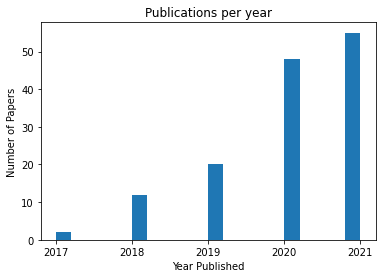

In [455]:
# x-axis should only display integer
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Plot barchart for publications per year
publish_times = ref['Year']
plt.hist(publish_times, bins=20)

plt.title("Publications per year")
plt.xlabel("Year Published")
plt.ylabel("Number of Papers")

# Save plot
plt.savefig('BA_barchart_publications_year.png')

# Display plot
plt.show()

✔️ **Most papers were published in 2021.**

## **Tree map "Authors"**

In [456]:
# Print 'Author' column
ref['Author']

0                 Bayanifar, Hessamedin; Kühnle, Hermann
1                            Shoumen Palit Austin, Datta
2      Becue, Adrien; Fourastier, Yannick; Praca, Isa...
3      Bitton, Ron; Gluck, Tomer; Stan, Orly; Inokuch...
4      Calo, Seraphin; Verma, Dinesh; Chakraborty, Su...
                             ...                        
133    U. Khan, Latif; Saad, Walid; Niyato, Dusit; Ha...
134    Vakaruk, Stanislav; Mozo, Alberto; Pastor, Ant...
135    Vielberth, Manfred; Glas, Magdalena; Dietz, Ma...
136                  Xu, Qinghua; Ali, Shaukat; Yue, Tao
137    Stirna, J.; Stefanišina, I.; Grabis, J.; Ropon...
Name: Author, Length: 138, dtype: object

In [457]:
from collections import Counter

# Create table to display the 30 most frequent authors and the count
a = Counter([y for x in ref['Author'] for y in x.split("; ")]).most_common(30)
b = Counter([y for x in ref['Author'] for y in set(x.split())]).most_common(30)
count = pd.DataFrame(a, columns=['author','frequency'])

count

,author,frequency
0,"Eckhart, Matthias",8
1,"Ekelhart, Andreas",6
2,"Dietz, Marietheres",5
3,"Pernul, Günther",5
4,"Damjanovic-Behrendt, Violeta",3
5,"Weippl, Edgar",3
6,"Kihl, Maria",3
7,"Gupta, Maanak",3
8,"Suhail, Sabah",3
9,"Jurdak, Raja",3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


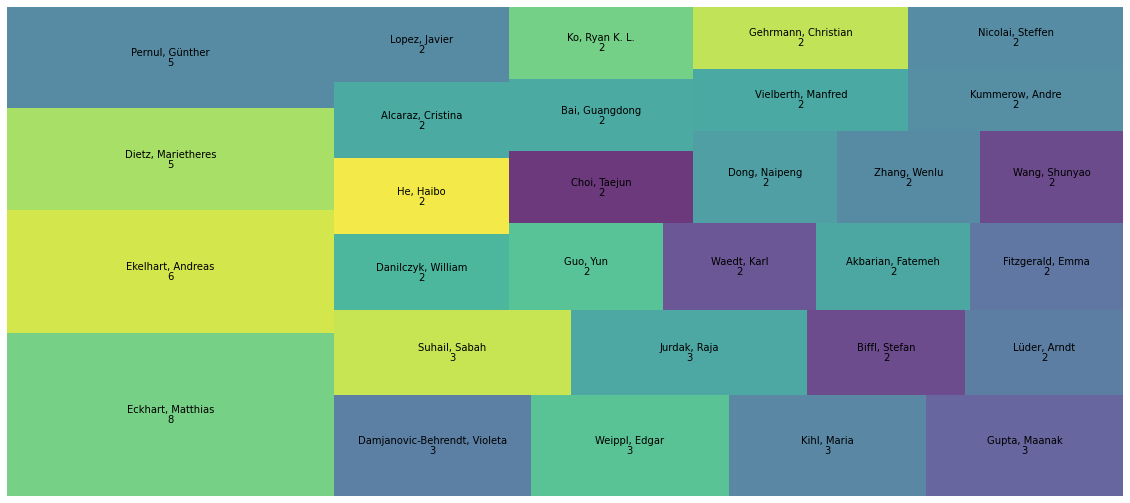

In [458]:
!pip install squarify
import squarify

# Plot the data
plt.figure(figsize=(20,9))
plt.axis('off')
squarify.plot(sizes=count['frequency'], label = count['author'], alpha = 0.8, value=count['frequency'])

# Save the plot
plt.savefig('BA_treemap_author_frequency.png')

# Display the treemap with the 30 most frequent authors 
plt.show()

✔️ **The most frequent author of the references is Matthias Eckhart.**

## **Pie charts "Publications"**

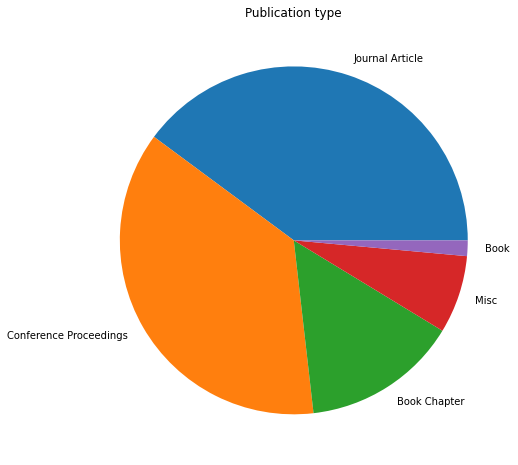

In [459]:
# Plot the pie chart
plt.figure(figsize=(15,8))
ref['BibliographyType'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.title('Publication type')

# Save the figure
plt.savefig('BA_piechart_publication_type.png')

# Display the pie chart
plt.show()

✔️ **The majority of papers are conference procceedings and journal articles.**

#🔬 **2. RQ1: Definition and components**

### **Length of definition**

In [460]:
# Create new dataframe with citation key and definitions
coding = df[['citation_key', 'DT_definition']].copy()

# Remove the empty rows
coding.dropna(inplace=True)

# Print the 5th definition
coding.iloc[5,1]

'A digital twin can be defined as an evolving digital profile of the historical and current behavior of a  physical object or process. The digital twin is based on massive, cumulative, real-time, real-world data measurements across an array of dimensions.'

In [461]:
# Count the length of each definition and create new column with definition length
coding['length'] = coding['DT_definition'].apply(len)

# Print the dataframe with length of each definition
coding

,citation_key,DT_definition,length
1,Akbarian2020,"""mirror the internal behaviour of physical sys...",51
2,Almeaibed2021,"""In the perspective of autonomous vehicles, a ...",206
3,Anthony2020,"""DTs have been proved usefully in \noptimising...",222
4,Assenza2020,"""The simulations can also be fast-forwarded ...",138
5,Atalay2020,"At a high level, a digital twin can be de?ned ...",107
...,...,...,...
109,Veledar2019,The Digital Twin is a virtual counterpart to a...,79
111,Xinxin2019,Digital Twin (DT) is a technology to model ass...,258
112,Xu2020ab,"a Digital Twin (DT), which is an online digita...",77
113,Xu2021,a digital replica of a living or non-living ph...,225


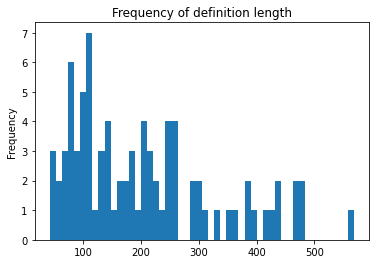

In [462]:
# Plot the length of the definitions
plt.title("Frequency of definition length")
plt.savefig('RQ1_DTD_barchart_definition_length.png')

# Plot the definitions by length
coding['length'].plot(bins=50, kind='hist')

# Show the plot
plt.show()

In [463]:
# Descriptions for the definition length
coding['length'].describe()

count     84.000000
mean     204.761905
std      126.646707
min       42.000000
25%      102.750000
50%      180.000000
75%      255.000000
max      569.000000
Name: length, dtype: float64

In [464]:
# Print longest definition with 569 characters
coding[coding['length'] == 569]['DT_definition'].iloc[0]

'A digital twin is a digital representation of a physical object,\nprocess, or system, and it can exist in many forms. Digital\nTwin in the human context is all the data footprint that we\nas humans create through our attributes and interactions.\nAttributes are core data that make up what we are, including\nname, age, gender, address, ethnicity, education, salary, etc.\nInteraction refers to all the data and footprint that is created\nwhen we interact with the external world. The term Digital\nTwin, therefore, can be loosely applied to any form of digital\nrepresentation.'

✔️ **The longest definition has 569 characters. It is made obvious that some text preprocessing should follow.**



## **Bar chart "Components"**

### **Text Preprocessing**

#### **Remove some fragements**

In [465]:
# Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing the noisy text
def denoise_text(text):
  # text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

# Convert column to string
coding['DT_definition']=coding['DT_definition'].apply(str)

# Apply function on definition column
coding['DT_definition']=coding['DT_definition'].apply(denoise_text)
 
# Print definition column
coding['DT_definition']

1      "mirror the internal behaviour of physical sys...
2      "In the perspective of autonomous vehicles, a ...
3      "DTs have been proved usefully in \noptimising...
4      "The simulations can also be fast-forwarded ...
5      At a high level, a digital twin can be de?ned ...
                             ...                        
109    The Digital Twin is a virtual counterpart to a...
111    Digital Twin (DT) is a technology to model ass...
112    a Digital Twin (DT), which is an online digita...
113    a digital replica of a living or non-living ph...
114    A DT could be a virtual prototype of a\nCPS, r...
Name: DT_definition, Length: 84, dtype: object

#### **Remove special characters**

In [466]:
# Remove special characters from column
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

# Apply function on definition column
coding['DT_definition']=coding['DT_definition'].apply(remove_special_characters)

# Print definition column
coding['DT_definition']

1      mirror the internal behaviour of physical systems
2      In the perspective of autonomous vehicles a di...
3      DTs have been proved usefully in \noptimising ...
4      The simulations can also be fastforwarded to f...
5      At a high level a digital twin can be dened as...
                             ...                        
109    The Digital Twin is a virtual counterpart to a...
111    Digital Twin DT is a technology to model asset...
112    a Digital Twin DT which is an online digital m...
113    a digital replica of a living or nonliving phy...
114    A DT could be a virtual prototype of a\nCPS re...
Name: DT_definition, Length: 84, dtype: object

#### **Remove special characters**

In [467]:
#set stopwords to english
#stop=set(stopwords.words('english'))
#print(stop)

In [468]:
# Removing the stopwords
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on definition column
coding['DT_definition']=coding['DT_definition'].apply(remove_stopwords)

# Print definition column
coding['DT_definition']

1             mirror internal behaviour physical systems
2      perspective autonomous vehicles digital twin r...
3      DTs proved usefully optimising systems based c...
4      simulations also fastforwarded foresee eects u...
5      high level digital twin dened virtual replica ...
                             ...                        
109    Digital Twin virtual counterpart actual physic...
111    Digital Twin DT technology model assets geomet...
112    Digital Twin DT online digital model physical ...
113    digital replica living nonliving physical enti...
114    DT could virtual prototype CPS reflecting part...
Name: DT_definition, Length: 84, dtype: object

#### **Lemmatization**

In [469]:
# Lemming the text
nltk.download('wordnet')

def Lemmatizer(text):
    WS=WordNetLemmatizer()
    text= ' '.join([WS.lemmatize(word) for word in text.split()])
    return text
    
# Apply function on definition column
coding['DT_definition']= coding['DT_definition'].apply(Lemmatizer)

# Convert whole column to lowercase
coding['DT_definition']= coding['DT_definition'].str.lower()

# Print definition column
coding['DT_definition']

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


1              mirror internal behaviour physical system
2      perspective autonomous vehicle digital twin re...
3      dts proved usefully optimising system based co...
4      simulation also fastforwarded foresee eects up...
5      high level digital twin dened virtual replica ...
                             ...                        
109    digital twin virtual counterpart actual physic...
111    digital twin dt technology model asset geometr...
112    digital twin dt online digital model physical ...
113    digital replica living nonliving physical enti...
114    dt could virtual prototype cps reflecting part...
Name: DT_definition, Length: 84, dtype: object

#### **Tokenize the text**

In [470]:
# Tokenize text
nltk.download('punkt');

def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()] 

# Create a copy of coding dataframe
coding4 = coding

# Apply tokenize function for the definition column
coding4['tokenized'] = coding4.apply(lambda x: tokenize(x['DT_definition']), axis=1)

# Print tokenized definition column
coding4['tokenized']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1        [mirror, internal, behaviour, physical, system]
2      [perspective, autonomous, vehicle, digital, tw...
3      [dts, proved, usefully, optimising, system, ba...
4      [simulation, also, fastforwarded, foresee, eec...
5      [high, level, digital, twin, dened, virtual, r...
                             ...                        
109    [digital, twin, virtual, counterpart, actual, ...
111    [digital, twin, dt, technology, model, asset, ...
112    [digital, twin, dt, online, digital, model, ph...
113    [digital, replica, living, nonliving, physical...
114    [dt, could, virtual, prototype, cps, reflectin...
Name: tokenized, Length: 84, dtype: object

#### **Display most frequent words**

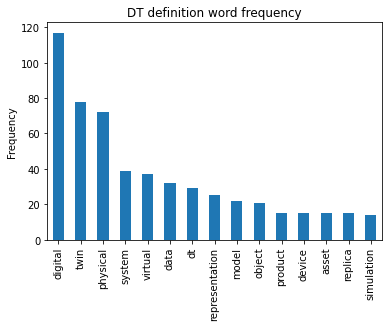

In [471]:
# Use explode to expand the lists into separate rows
dfe = coding4.tokenized.explode().to_frame().reset_index(drop=True)

# Plot the data
dfe.tokenized.value_counts().head(15).plot.bar()
plt.title("DT definition word frequency")
plt.ylabel("Frequency")

# Save the plot
plt.savefig('RQ1_DTD_barchart_definition_word_frequency.png')

# Show plot
plt.show()

✔️ **The most common words in definitions for the digital twins are: 'digital', 'twin', 'physical', 'system' and 'virtual'.**

## **Table "Digital Twin components"**




In [472]:
# Create new dataframe
new = coding

# Drop columns 'length' and 'tokenized'
new = new.drop('length', 1)
new = new.drop('tokenized', 1)

# Create a new row after each ' ' between the words of the preprocessed text and use as index the related citation_key
new = (new.set_index(['citation_key'])
   .apply(lambda x: x.str.split(' ').explode())
   .reset_index())  

# Create a new column 'counts' which shows total frequency of the word
new['counts'] = new['DT_definition'].map(new['DT_definition'].value_counts())

# Dataframe should only contain words with a total frequency bigger than 15
new = new[new['counts'] >= 15] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  if __name__ == '__main__':


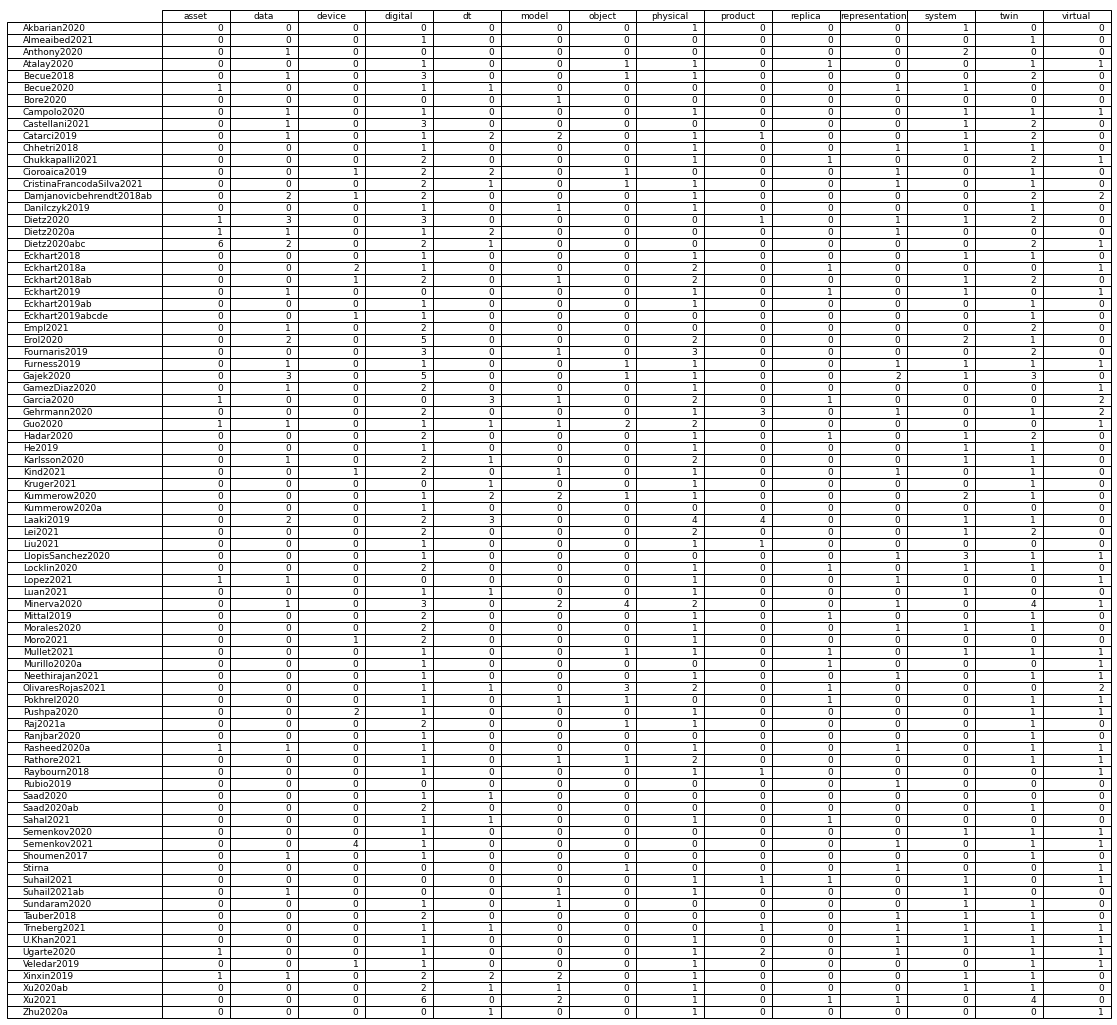

In [473]:
from sklearn.feature_extraction.text import CountVectorizer

s = new['DT_definition']
model = CountVectorizer(tokenizer=lambda x: x.split(' '))

# Create table with word frequency bigger than 15 in relation to the citation_key
new_table = pd.DataFrame(model.fit_transform(s).toarray(),
                        columns=model.get_feature_names(),
                        index=new.citation_key).sum(level=0)
                      
new_table


# set fig size
fig, ax = plt.subplots(figsize=(17, 3)) 
# no axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
# no frame
ax.set_frame_on(False)  
# plot table
tab = table(ax, new_table, loc='upper left')  
# set font manually
tab.auto_set_font_size(False)
tab.set_fontsize(9) 
# save the result
plt.savefig('RQ1_DTD_table_definition_word_frequency.png')

In [474]:
# Create table to display the 30 most frequent words in the definition and the count
from collections import Counter

a = Counter([y for x in dfe['tokenized'] for y in x.split(", ")]).most_common(30)
def_count = pd.DataFrame(a, columns=['word','frequency'])

def_count

,word,frequency
0,digital,117
1,twin,78
2,physical,72
3,system,39
4,virtual,37
5,data,32
6,dt,29
7,representation,25
8,model,22
9,object,21


## **Wordcloud "Digital Twin components"**

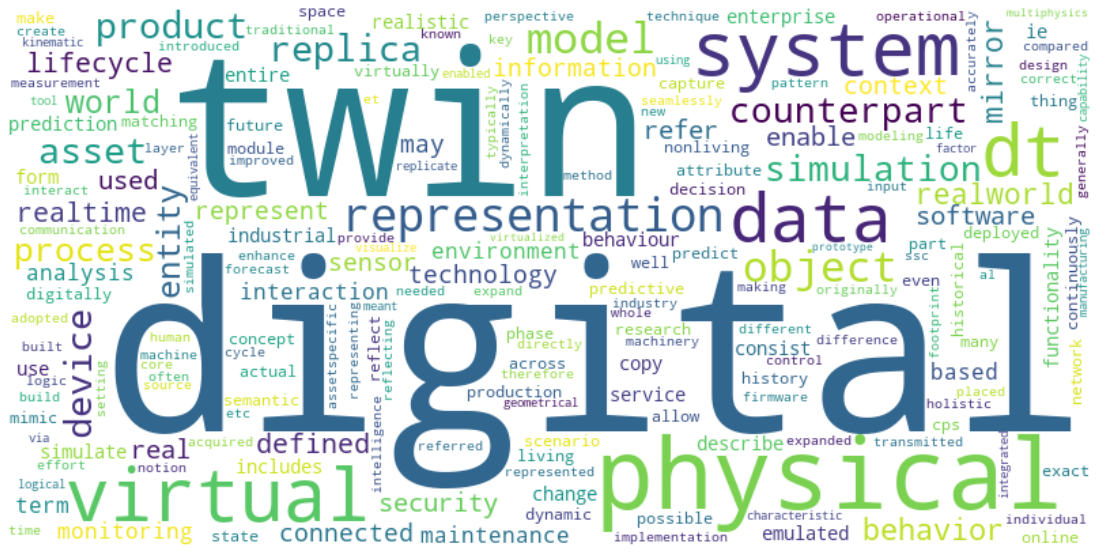

In [475]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

data = coding['DT_definition']
text = " ".join(i for i in data)
stopwords = set(STOPWORDS)

# Plot the wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400, collocations=False).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')

# Save the wordcloud
plt.savefig('RQ1_DTD_wordcloud_definition.png')
plt.axis("off")

# Show the wordcloud
plt.show()

## **Table "Digital Twin Advantages"**

In [476]:
# Create new dataframe for DT_advantages
coding3 = df[['citation_key', 'DT_advantages']].copy()

# Remove the empty rows
coding3.dropna(inplace=True)

coding3.iloc[0,1]

'So using this virtual environment for security tests instead of the real system prevents any interference with the live systems'

In [477]:
# Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing the noisy text
def denoise_text(text):
#   text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

# Convert the column to strings
coding3['DT_advantages']=coding3['DT_advantages'].apply(str)

# Apply function on DT_advantages column
coding3['DT_advantages']=coding3['DT_advantages'].apply(denoise_text)

In [478]:
# Remove special characters from column
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

# Apply the function on DT_advantages column
coding3['DT_advantages']=coding3['DT_advantages'].apply(remove_special_characters)

In [479]:
# Removing the stopwords
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

# Apply function on DT_advantages column
coding3['DT_advantages']=coding3['DT_advantages'].apply(remove_stopwords)

# Lemming the text
nltk.download('wordnet')

def Lemmatizer(text):
    WS=WordNetLemmatizer()
    text= ' '.join([WS.lemmatize(word) for word in text.split()])
    return text
    
# Apply function on DT_advantages column
coding3['DT_advantages']= coding3['DT_advantages'].apply(Lemmatizer)

# Convert the whole DT_advantages to lowercase
coding3['DT_advantages']= coding3['DT_advantages'].str.lower()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [480]:
# Create new dataframe
DT_adv = coding3

# Create a new row after each ' ' between the words of the preprocessed text and use as index the related citation_key
DT_adv = (DT_adv.set_index(['citation_key'])
   .apply(lambda x: x.str.split(' ').explode())
   .reset_index())  

# Create a new column 'counts' which shows total frequency of the word
DT_adv['counts'] = DT_adv['DT_advantages'].map(DT_adv['DT_advantages'].value_counts())

# Dataframe should only contain words with a total frequency bigger than 15
DT_adv = DT_adv[DT_adv['counts'] >= 15] 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  if __name__ == '__main__':


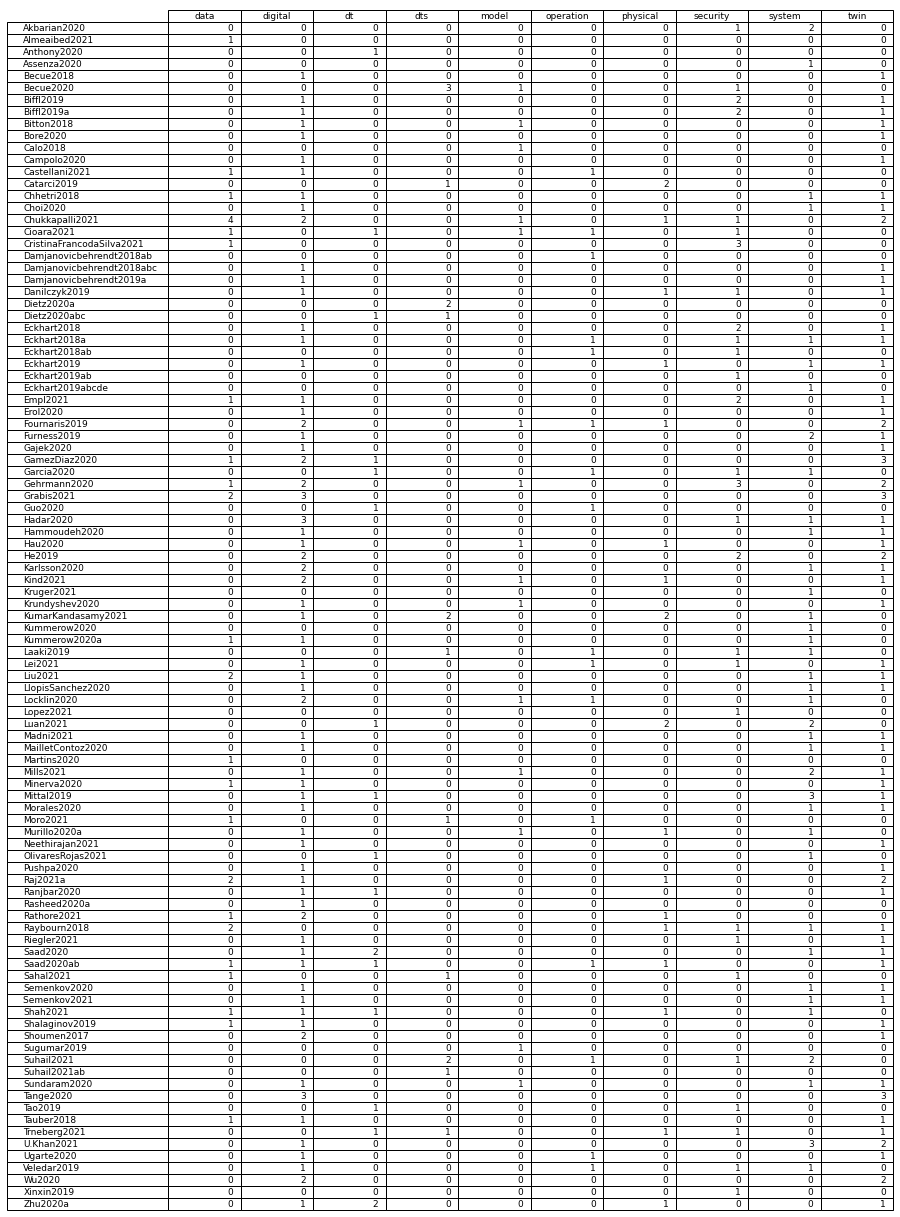

In [481]:
from sklearn.feature_extraction.text import CountVectorizer

s = DT_adv['DT_advantages']
model = CountVectorizer(tokenizer=lambda x: x.split(' '))

# Create table with word frequency bigger than 15 in relation to the citation_key
adv_table = pd.DataFrame(model.fit_transform(s).toarray(),
                        columns=model.get_feature_names(),
                        index=DT_adv.citation_key).sum(level=0)

# To save the table we have to save it on a plot and remove the axis            
from pandas.plotting import table

# set fig size
fig, ax = plt.subplots(figsize=(13, 3)) 
# no axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
# no frame
ax.set_frame_on(False)  
# plot table
tab = table(ax, adv_table, loc='upper left')  
# set font manually
tab.auto_set_font_size(False)
tab.set_fontsize(9) 
# save the result
plt.savefig('RQ1_DTD_table_advantages.png')

In [482]:
# Tokenize text
nltk.download('punkt');

def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()] 

# Create copy of coding3 dataframe (with DT_advantages)
coding5 = coding3

# Create a new column 'tokenized' with tokenized words from 'DT_advantages' column
coding5['tokenized'] = coding5.apply(lambda x: tokenize(x['DT_advantages']), axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


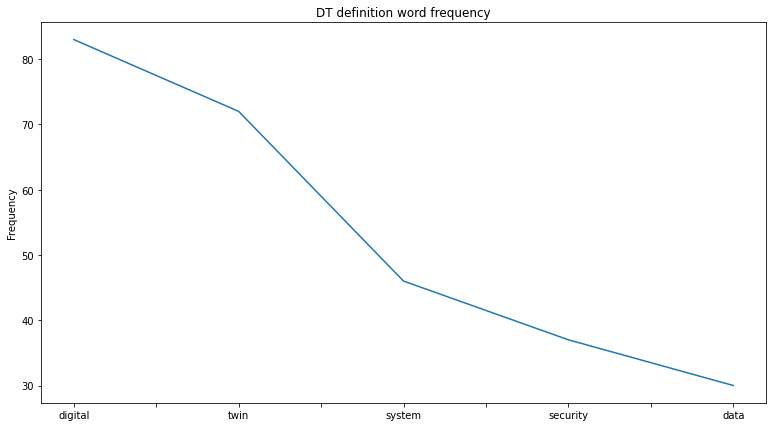

In [483]:
# Use explode to expand the lists into separate rows
dfe = coding5.tokenized.explode().to_frame().reset_index(drop=True)

# Plot the data
pltf = dfe.tokenized.value_counts().head(5).plot(figsize=(13,7))
plt.title("DT definition word frequency")
plt.ylabel("Frequency")
plt.savefig('RQ1_DTD_linediagram_definition_word_frequency.png')

# Show the linediagram
plt.show()

#⚙️ **3. RQ2: Digital Twin Application**

## **Table "Application Domain"**

In [484]:
coding2 = df

# replace each of these characters with ','  
coding2 = coding2.replace({", ": ",", " , ": ",", "/": ",", "/ ": ",", " / ": ",", " and ": ","}, regex=True)

# Create new dataframe, split rows of column 'Author' after each ',' '.
coding2 = (coding2.set_index(['citation_key', 'relevance', 'main_contribution', 'DT_definition', 'DT_advantages',
'application_scenario', 'relevant_asset', 'DT_location', 'data_type', 'communication_type', 'integration_level', 'used_protocols', 'used_tools', 'operation_mode', 'DT_generator',  'framework', 'challenges'])
    .apply(lambda x: x.str.split(',').explode())
   .reset_index())  


# Converts the whole df to lowercase
coding2 = coding2.applymap(lambda s: s.lower() if type(s) == str else s)

# Remove the nan values
coding2 = coding2[coding2['application_domain'].notna()]

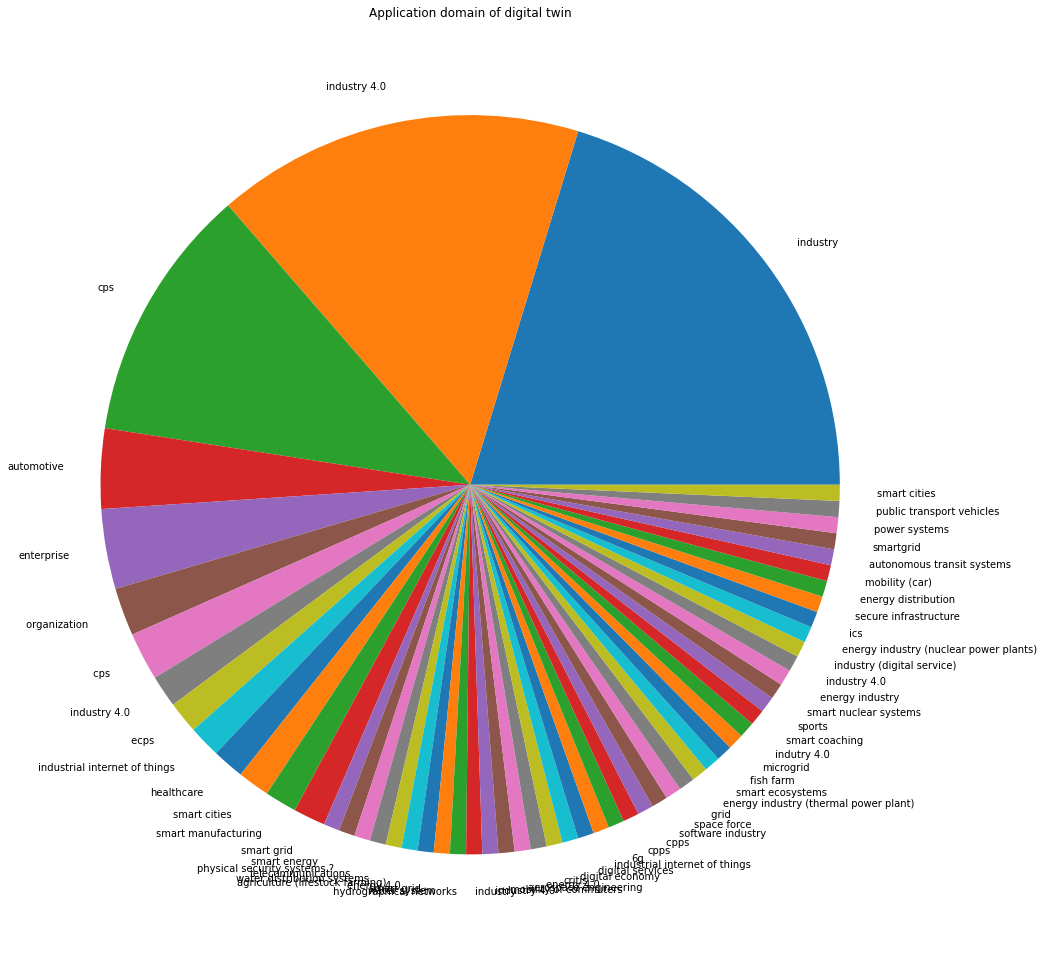

In [485]:
plt.figure(figsize=(23,17))

# Plot the pie chart
coding2['application_domain'].value_counts().plot(kind='pie')

# Adding Title of chart
plt.title('Application domain of digital twin')
plt.ylabel('')
plt.savefig('RQ3_DTA_piechart_application_domain.png')

# Displaying the chart
plt.show()

**✔️ CPS and Industry 4.0 are the predominant used application domains.**

## **Bubble Chart "Application Scenarios"**

**Edit the csv-file:**
1. split the elements with ';'
2. (remove all stopwords (and, or, to, etc.))
3. perhaps try to find common denominators

**Code:** 
1. Convert df to lower case
2. Split after each ';' new row
3. Count the frequency of each application scenario
4. Plot Bubble Chart

In [486]:
coding6 = df[['citation_key', 'application_scenario']].copy()

# Remove the empty rows
coding6.dropna(inplace=True)

coding6.iloc[0,1]

'Intrusion Detection'

In [487]:
# Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing the noisy text

def denoise_text(text):
#   text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

coding6['application_scenario']=coding6['application_scenario'].apply(str)

# Apply function on 'application_scenario' column
coding6['application_scenario']=coding6['application_scenario'].apply(denoise_text)

In [488]:
# Remove special characters from column
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

# Apply function to 'application_scenario' column
coding6['application_scenario']=coding6['application_scenario'].apply(remove_special_characters)

In [489]:
# Removing the stopwords
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

# Apply function on review column
coding6['application_scenario']=coding6['application_scenario'].apply(remove_stopwords)

# Lemming the text
nltk.download('wordnet')

def Lemmatizer(text):
    WS=WordNetLemmatizer()
    text= ' '.join([WS.lemmatize(word) for word in text.split()])
    return text
    
# Apply function on 'application_scenario' column
coding6['application_scenario']= coding6['application_scenario'].apply(Lemmatizer)

coding6['application_scenario']= coding6['application_scenario'].str.lower()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [490]:
# Tokenize text
nltk.download('punkt');

def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()] 

# Create copy of coding dataframe
coding7 = coding6

coding7['tokenized'] = coding7.apply(lambda x: tokenize(x['application_scenario']), axis=1)

coding7['tokenized']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1                                 [intrusion, detection]
2             [security, testing, generation, knowledge]
4                                 [intrusion, detection]
5              [penetration, test, intrusion, detection]
6      [evaluation, security, testing, intrustion, de...
                             ...                        
110        [simulation, anomaly, monitoring, prediction]
111                    [safety, cybersecurity, analysis]
112    [secure, estimation, control, cyberphysical, s...
113                                 [anomaly, detection]
114    [fault, detection, detecting, sophisticated, a...
Name: tokenized, Length: 113, dtype: object

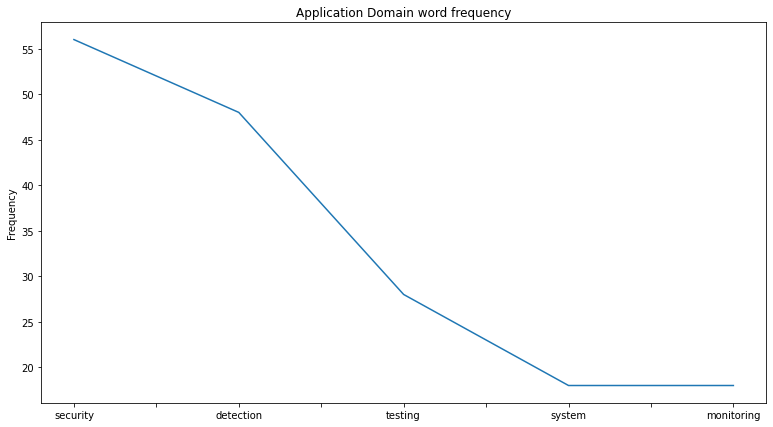

In [491]:
# use explode to expand the lists into separate rows
dfe2 = coding7.tokenized.explode().to_frame().reset_index(drop=True)

# groupby the values in the column, get the count and sort
pltf = dfe2.tokenized.value_counts().head(5).plot(figsize=(13,7))

plt.ylabel("Frequency")
plt.title("Application Domain word frequency")
plt.savefig('RQ2_DTA_linediagram_application_domain.png')

plt.show()

In [492]:
# Create table to display the 30 most frequent words in the definition and the count
from collections import Counter

# Count the frequency of the most 13 most common application scenario words
a = Counter([y for x in coding7['application_scenario'] for y in x.split(" ")]).most_common(13) # ';' after data preparation
application_count = pd.DataFrame(a, columns=['word','frequency'])

# Add 13 colors for each bubble
application_count['color'] = ['#5A69AF', '#579E65', '#F9C784', '#FC944A',
              '#F24C00', '#00B825', '#FC944A', '#EF4026',
              'goldenrod','green', '#F9C784', '#FC944A',
              'coral'] #8 colors bei frequency >15

#application_count

In [493]:
# Import packed bubble chart Class from matplotlib (with all functions)
class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')

In [494]:
# Call the BubbleChart class with a bubble_spacing parameter (specifies minimal spacing between the bubbles)

bubble_chart = BubbleChart(area=application_count['frequency'],
                           bubble_spacing=0.1)
bubble_chart.collapse()

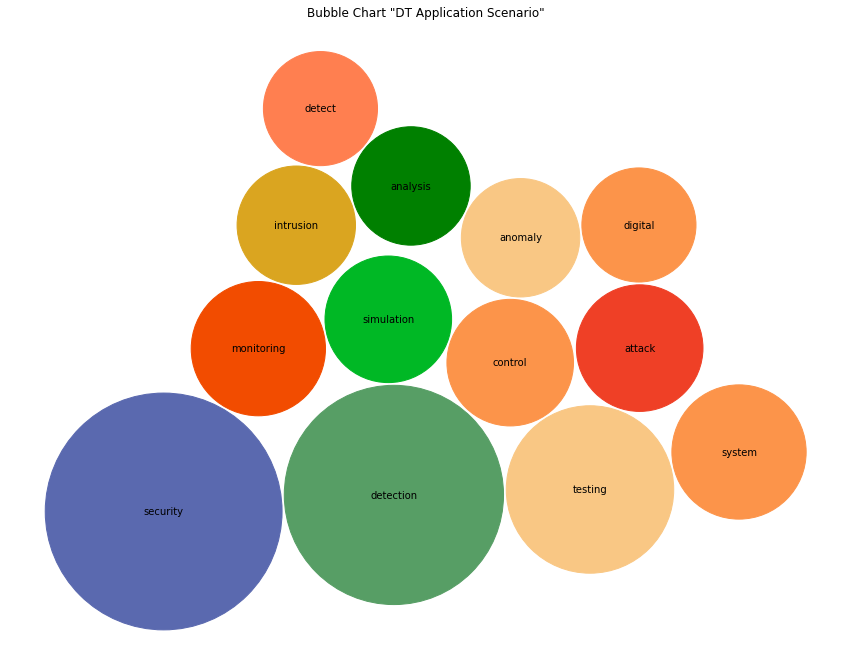

In [495]:
# Plot the packed bubble chart
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
fig.set_size_inches(15, 20, forward=True)
bubble_chart.plot(
    ax, application_count['word'], application_count['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()

# Adding Title of chart
plt.title('Bubble Chart "DT Application Scenario"')
plt.savefig('RQ3_DTI_bubblechart_application_scenario.png')
plt.ylabel('')

# Display the plotted bubble chart 
plt.show()

**✔️ Most common application scenarios for the digital twin are security, detection, testing and system monitoring.**

#🧪 **4. RQ3: Implementing Digital Twins**

## **Doughnut Chart "Location"**

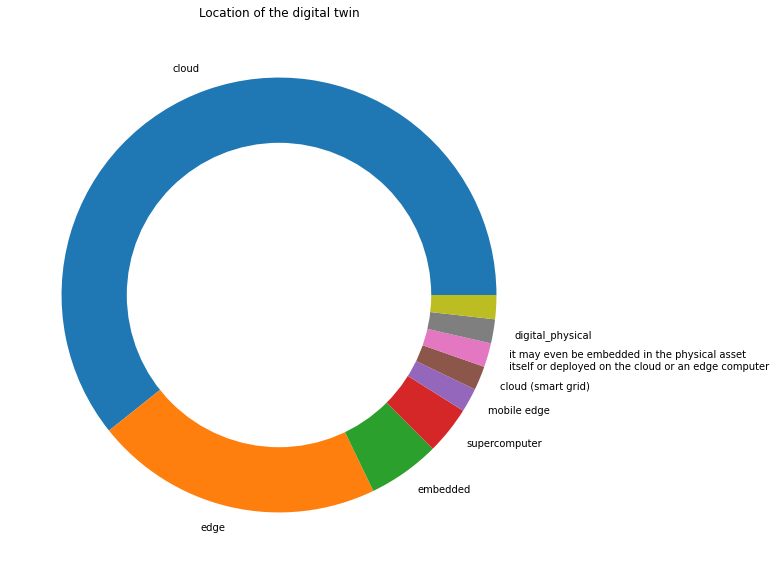

In [496]:
# Create new df4
df4 = df

# replace the ', ' with ','
df4 = df4.replace(', ',',', regex=True)

# Create new dataframe, split rows of column 'Author' after each ',' 
df4 = (df4.set_index(['citation_key', 'relevance', 'main_contribution', 'DT_definition', 'DT_advantages', 'application_domain',
'application_scenario', 'relevant_asset', 'data_type', 'communication_type', 'integration_level', 'used_protocols', 'used_tools', 'operation_mode', 'DT_generator',  'framework', 'challenges'])
   .apply(lambda x: x.str.split(',').explode())
   .reset_index())  

# Converts the whole df to case
df4 = df4.applymap(lambda s: s.lower() if type(s) == str else s) 

# Configure size
plt.figure(figsize=(15,8))

# Plot the pie chart
df4['DT_location'].value_counts().plot(kind='pie', figsize=(20,10)) 

# Draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart "to create doughnut chart"
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Location of the digital twin')
plt.savefig('RQ4_RC_doughnutchart_location.png')
plt.ylabel('')


# Displaying doughnut chart
plt.show() # Note: shows wrong value DIGITAL_PHYSICAL (belongs possibly to communcation)

✔️ **More than half of the authors deployed the digital twin on the cloud.**

## **Word Cloud "Relevant Assets"**

In [497]:
df8 = df[['citation_key', 'relevant_asset']].copy()

# Remove the empty rows
df8.dropna(inplace=True)
df8

,citation_key,relevant_asset
1,Akbarian2020,ICS Network
2,Almeaibed2021,Car Data
3,Anthony2020,"Production, Climate, Energy"
5,Atalay2020,"Smart Meter, Actuator, Network traffic"
6,Ayodeji2020,Process
...,...,...
110,Wu2020,CPS/CPPS
111,Xinxin2019,"power plants, ICS"
112,Xu2020ab,CPS
113,Xu2021,CPS


In [498]:
# Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing the noisy text

def denoise_text(text):
#   text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

# Convert column to string
df8['relevant_asset']=df8['relevant_asset'].apply(str)

# Apply function on 'relevant_asse3t column
df8['relevant_asset']=df8['relevant_asset'].apply(denoise_text)

# Remove special characters from column
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

# Apply function on 'relevant_asset' column
df8['relevant_asset']=df8['relevant_asset'].apply(remove_special_characters)

# Removing the stopwords
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

# Apply function on 'relevant_asset' column
df8['relevant_asset']=df8['relevant_asset'].apply(remove_stopwords)

# Lemming the text
# nltk.download('wordnet')

def Lemmatizer(text):
    WS=WordNetLemmatizer()
    text= ' '.join([WS.lemmatize(word) for word in text.split()])
    return text
    
# Apply function on 'relevant_asset' column
df8['relevant_asset']=df8['relevant_asset'].apply(Lemmatizer)

# Print column
df8['relevant_asset']

1                               ICS Network
2                                  Car Data
3                 Production Climate Energy
5      Smart Meter Actuator Network traffic
6                                   Process
                       ...                 
110                                 CPSCPPS
111                         power plant ICS
112                                     CPS
113                                     CPS
114                                     CPS
Name: relevant_asset, Length: 100, dtype: object

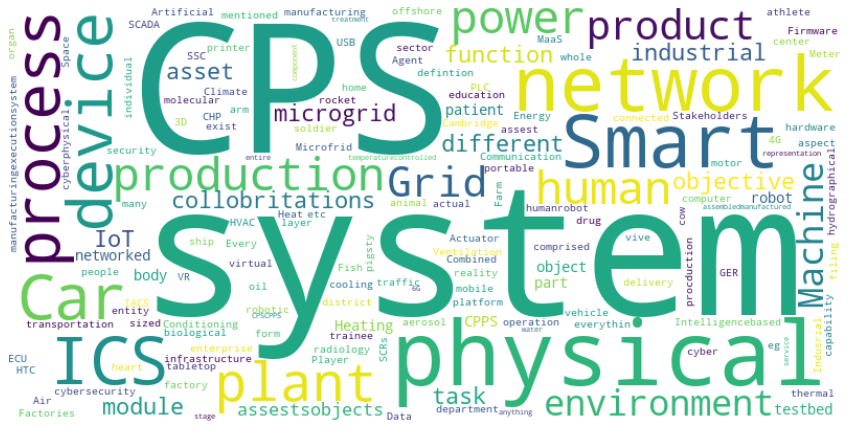

In [499]:
text = " ".join(i for i in df8['relevant_asset']) # after text preprocessing : "; "

# Plot the wordcloud
wordcloud2 = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400, collocations=False).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.savefig('RQ4_RC_wordcloud_relevant_asset.png')
plt.axis("off")

# Show the wordcloud
plt.show()

## **Bar Chart "Data Type"**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0, fl

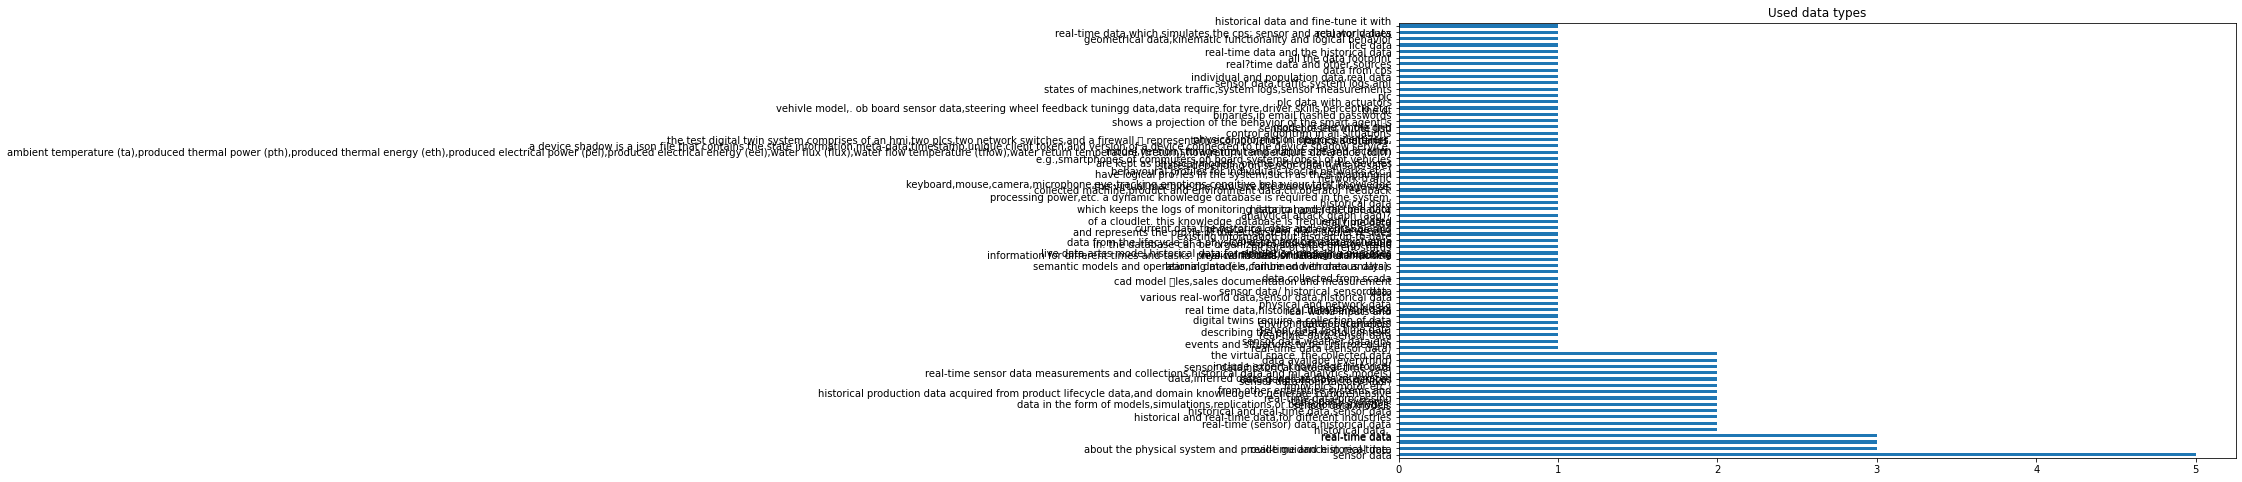

In [500]:
# Create new df4
df9 = df

# replace the ', ' with in the 
df9 = df9.replace(', ',',', regex=True)

# Create new dataframe, split rows of column 'Author' after each ';' 
df9 = (df9.set_index(['citation_key', 'relevance', 'main_contribution', 'DT_definition', 'DT_advantages', 'application_domain',
'application_scenario', 'relevant_asset', 'DT_location','communication_type', 'integration_level', 'used_protocols', 'used_tools', 'operation_mode', 'DT_generator',  'framework', 'challenges'])
   .apply(lambda x: x.str.split(',').explode())
   .reset_index())  

# Converts the whole df to case
#### (probably only for the specific col ' DT_location' better)
df9 = df9.applymap(lambda s: s.lower() if type(s) == str else s) 

# Configure size
plt.figure(figsize=(15,8))

# Plot the pie chart
df4['data_type'].value_counts().plot(kind='barh') 

# Adding Title of chart
plt.title('Used data types')
plt.ylabel('')

# Saving the figure
plt.savefig('RQ4_RC_barchart_data_type.png')

# Displaying Chart
plt.show()

## **Table "Tools used"**

In [501]:
coding4 = df[['citation_key','used_tools']].copy()

coding4 = coding4.dropna()

In [502]:
# Text preprocessing for coding4 

# Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing the noisy text

def denoise_text(text):
#   text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

# Convert column to string
coding4['used_tools']=coding4['used_tools'].apply(str)

# Apply function on 'relevant_asse3t column
coding4['used_tools']=coding4['used_tools'].apply(denoise_text)

# Remove special characters from column
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9,\s]' # don't remove the commas ! 
    text=re.sub(pattern,'',text)
    return text

# Apply function on 'relevant_asset' column
coding4['used_tools']=coding4['used_tools'].apply(remove_special_characters)

# Removing the stopwords
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

# Apply function on 'relevant_asset' column
coding4['used_tools']=coding4['used_tools'].apply(remove_stopwords)

# Lemming the text
# nltk.download('wordnet')

#def Lemmatizer(text):
 #   WS=WordNetLemmatizer()
  #  text= ' '.join([WS.lemmatize(word) for word in text.split()])
  #  return text
    
# Apply function on 'relevant_asset' column
#coding4['used_tools']=coding4['used_tools'].apply(Lemmatizer)

#coding3 = coding3.dropna()

# Print column
coding4

,citation_key,used_tools
1,Akbarian2020,Simulink
3,Anthony2020,Anylogic
6,Ayodeji2020,"Nmap , Nessus"
9,Becue2018,CyberFactory1
10,Becue2020,"CPS Twinning , Wrld3d , Mago3d , iMaintenance ..."
13,Bitton2018,"GRASSMARLIN , OpenVAS , Zeus Scanner , Nmap"
16,Campolo2020,"User Equipmment App , Mosquitto , Wireshark , ..."
17,Castellani2021,"PyOD , Keras , Tensorflow , SimulatinX , Modelica"
18,Catarci2019,"Eclipse Ditto , GE Predix , Bosch IoT Things ,..."
20,Choi2020,"InTouch software Schneider Electric , AllenBra..."


In [503]:
coding4 = coding4.replace({", ": ";", " , ": ";"}, regex=True) # Edit csv file (not able to seperate the values)
coding4

,citation_key,used_tools
1,Akbarian2020,Simulink
3,Anthony2020,Anylogic
6,Ayodeji2020,Nmap ;Nessus
9,Becue2018,CyberFactory1
10,Becue2020,CPS Twinning ;Wrld3d ;Mago3d ;iMaintenance ;Ec...
13,Bitton2018,GRASSMARLIN ;OpenVAS ;Zeus Scanner ;Nmap
16,Campolo2020,User Equipmment App ;Mosquitto ;Wireshark ;DT ...
17,Castellani2021,PyOD ;Keras ;Tensorflow ;SimulatinX ;Modelica
18,Catarci2019,Eclipse Ditto ;GE Predix ;Bosch IoT Things ;Mi...
20,Choi2020,InTouch software Schneider Electric ;AllenBrad...


In [504]:
s = coding4['used_tools']#.str.replace('#|\$|\+1234567890()"', "")

model = CountVectorizer(tokenizer=lambda x: x.split(';'))


df_final2 = pd.DataFrame(model.fit_transform(s).toarray(),
                        columns=model.get_feature_names(),
                        index=coding4.citation_key).sum(level=0)
                      
df_final2 # > 5 count

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  


,,agihack analytical attack graph aag,allenbradley compactlogix 5370l3 simulates conveyor belt schneider electric modicon m580 used wind farm digital twin providing electricity conveyor belt,also improved ls,amazon web services,ami meters,anylogic,apache kafka,artss modeling tool,aspera,...,tensorflow,thingworx,twincontrol,ulcs,user equipmment app,water distribution wadi,wireshark,wntr,wrld3d,zeus scanner
citation_key,,,,,,,,,,,,,,,,,,,,,
Akbarian2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anthony2020,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ayodeji2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Becue2018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Becue2020,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
Bitton2018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Campolo2020,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
Castellani2021,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Catarci2019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Table operation modes"**

In [505]:
coding3 = df[['operation_mode', 'citation_key']].copy()

# Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing the noisy text

def denoise_text(text):
#   text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

# Convert column to string
coding3['operation_mode']=coding3['operation_mode'].apply(str)

# Apply function on 'relevant_asse3t column
coding3['operation_mode']=coding3['operation_mode'].apply(denoise_text)

# Remove special characters from column
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9,\s]' # don't remove the commas ! 
    text=re.sub(pattern,'',text)
    return text

# Apply function on 'relevant_asset' column
coding3['operation_mode']=coding3['operation_mode'].apply(remove_special_characters)

# Removing the stopwords
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

# Apply function on 'relevant_asset' column
coding3['operation_mode']=coding3['operation_mode'].apply(remove_stopwords)

# Lemming the text
# nltk.download('wordnet')

def Lemmatizer(text):
    WS=WordNetLemmatizer()
    text= ' '.join([WS.lemmatize(word) for word in text.split()])
    return text
    
# Apply function on 'relevant_asset' column
coding3['operation_mode']=coding3['operation_mode'].apply(Lemmatizer)

#coding3 = coding3.dropna()

# Print column
coding3

,operation_mode,citation_key
1,"Kalman Filter detection , Particle Swarm Optim...",Akbarian2020
2,Simulation,Almeaibed2021
3,Simulation,Anthony2020
4,nan,Assenza2020
5,"Simulation , Optimization , Machine Learning ,...",Atalay2020
...,...,...
293,nan,NaN
294,nan,NaN
295,nan,NaN
296,nan,NaN


In [506]:
out = (
    coding3.assign(Operation_Mode=lambda coding3: coding3.operation_mode.str.split(' , '))   # Create a column 'World' with the list of words 
      .explode('Operation_Mode')#.head(20)  # explode the list of words into new rows 
      .pipe(lambda coding: pd.crosstab(coding.Operation_Mode, coding.citation_key)) # cross table/ pivot table between 'Word' and 'Label' columns
      .assign(Count=lambda coding3: coding3.sum(axis=1))   # Count the column's total
      .reset_index()  # 'Operation_Mode' index to column
      .rename_axis(columns=None) # remove the name ('Label') of the columns axis
)
out 

# Save
# set fig size
#fig, ax = plt.subplots(figsize=(17, 3)) 
# no axes
#ax.xaxis.set_visible(False)  
#ax.yaxis.set_visible(False)  
# no frame
#ax.set_frame_on(False)  
# plot table
#tab = table(ax, out, loc='upper left')  
# set font manually
#tab.auto_set_font_size(False)
#tab.set_fontsize(9) 
# save the result
#plt.savefig('RQ4_RC_table_operation_mode.png')

,Operation_Mode,Akbarian2020,Akbarian2021,Almeaibed2021,Anthony2020,Assenza2020,Atalay2020,Ayodeji2020,Bajaj2020,Bayanifar2017,...,Ugarte2020,Vakaruk2021,Veledar2019,Vielberth2021a,Wu2020,Xinxin2019,Xu2020ab,Xu2021,Zhu2020a,Count
0,Adhoc algorithm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Analss,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,Analysis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
3,Cluster Center KNN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Data Analysis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,stress,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
77,suspicious behaviour,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
78,tempral behavioural analsis time series,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
79,virtual model,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1



## **Bubble Chart "Communication type"**

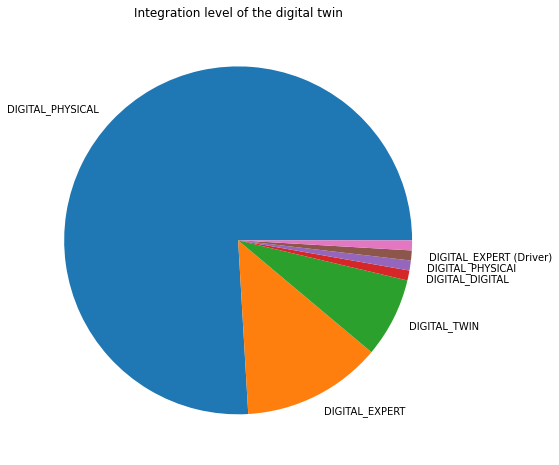

In [507]:
df8 = df

# Create new dataframe, split rows of column after ',' -> doesnt make that much sense here
df8 = (df8.set_index(['citation_key', 'integration_level', 'relevance', 'main_contribution', 'DT_definition', 'DT_advantages',
'application_scenario', 'application_domain', 'relevant_asset', 'DT_location', 'data_type', 'used_protocols', 'used_tools', 'operation_mode', 'DT_generator',  'framework', 'challenges'])
   .apply(lambda x: x.str.split(', ').explode()) # ', '
   .reset_index())  


# Configure size
plt.figure(figsize=(15,8))

# Plot the pie chart
df8['communication_type'].value_counts().plot(kind='pie')


# Adding Title of chart
plt.ylabel('')
plt.title('Integration level of the digital twin')
# Adding Title of chart

# Displaying Chart
plt.show()

In [508]:
com_df2 = df['communication_type'].copy()

# replace each of these characters with ','  
com_df2 = com_df2.replace({", ": " ", " , ": " ", " ,": " "}, regex=True)

top_N = 10

a = com_df2.str.lower().str.cat(sep=' ') # remove .str.lower() if necessary ("DIGITAL_PHYISCAl")
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)

rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['word', 'frequency'])

In [509]:
# Add 7 colors for each bubble -> after editing only 4 colors needed
rslt['color'] = ['#5A69AF', '#579E65', '#F9C784', '#FC944A',
              'goldenrod','green', '#F9C784'] 

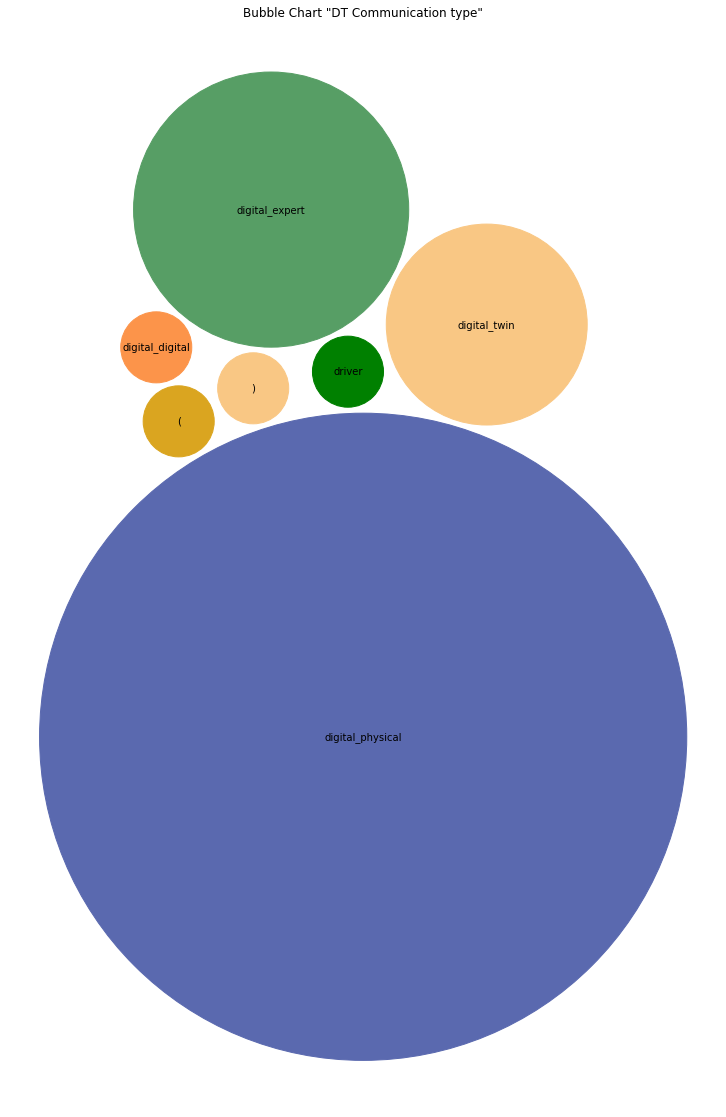

In [510]:
# Call the BubbleChart class with a bubble_spacing parameter (specifies minimal spacing between the bubbles)

bubble_chart = BubbleChart(area=rslt['frequency'],
                           bubble_spacing=0.1)
bubble_chart.collapse()

# Plot the packed bubble chart
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
fig.set_size_inches(15, 20, forward=True)
bubble_chart.plot(
    ax, rslt['word'], rslt['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()

# Adding Title of chart
plt.title('Bubble Chart "DT Communication type"')
plt.savefig('RQ4_RC_bubblechart_communication_type.png')
plt.ylabel('')

# Display the plotted bubble chart 
plt.show()

## **Pie Chart "Level of integration"**

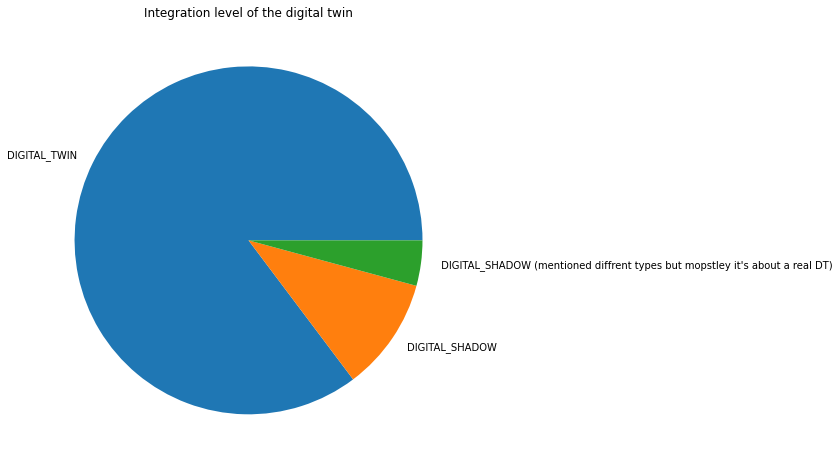

In [511]:
df6 = df

# Create new dataframe, split rows of column after ',' -> doesnt make that much sense here
df6 = (df6.set_index(['citation_key', 'relevance', 'main_contribution', 'DT_definition', 'DT_advantages',
'application_scenario', 'application_domain', 'relevant_asset', 'DT_location', 'data_type', 'communication_type', 'used_protocols', 'used_tools', 'operation_mode', 'DT_generator',  'framework', 'challenges'])
   .apply(lambda x: x.str.split(',').explode()) # ','
   .reset_index())  


# Configure size
plt.figure(figsize=(15,8))

# Plot the pie chart
df6['integration_level'].value_counts().plot(kind='pie')


# Adding Title of chart
plt.ylabel('')
plt.title('Integration level of the digital twin')
# Adding Title of chart
plt.savefig('RQ4_RC_piechart_integration_level.png')

# Displaying Chart
plt.show()

✔️ **The integration level is predominantly the digital twin.**

## **Stacked bar chart "Protocols"**

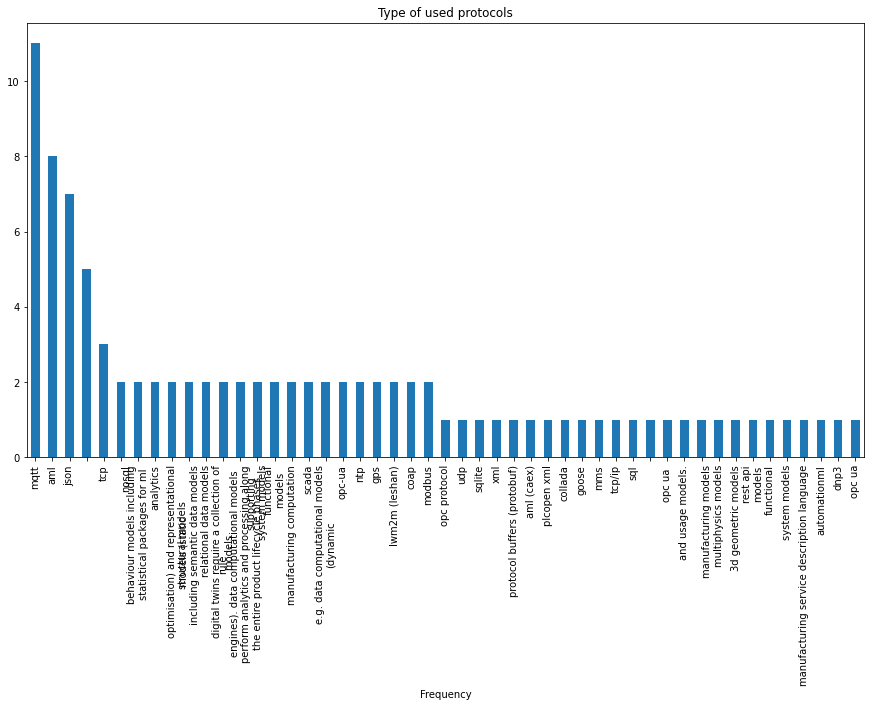

In [512]:
df7 = df

# replace the ', ' with in the 
df7 = df7.replace(', ',',', regex=True)

# Nicht nach jedem Komma ist auch sinnvoll
df7 = (df7.set_index(['citation_key', 'relevance', 'main_contribution', 'DT_definition', 'DT_advantages',
'application_scenario', 'application_domain', 'relevant_asset', 'DT_location', 'data_type', 'communication_type', 'integration_level', 'used_tools', 'operation_mode', 'DT_generator',  'framework', 'challenges'])
   .apply(lambda x: x.str.split(',').explode()) # ','
   .reset_index())  

####(maybe only for specific col better)
df7 = df7.applymap(lambda s: s.lower() if type(s) == str else s)

# Configure size
plt.figure(figsize=(15,8))

#Plot a histogram of frequencies
df7['used_protocols'].value_counts().plot(kind='bar', stacked=True) #stacked doesnt work 


# Adding Title of chart
plt.title('Type of used protocols')
plt.xlabel('Frequency')
# Adding Title of chart
plt.savefig('RQ4_RC_stacked_barchart_used_protocols.png')

# Displaying Chart
plt.show()

✔️ **The most frequently protocols/data formats used with digital twins are MQTT, AML and JSON.**